### Практическая работа Шубаева Максима, ММР214
#### Датасет посвящен оттоку банковских клиентов и их харакетиристикам

##### 1/customer_id, id потребителя банковских услуг
##### 2/credit_score, кредитный рейтинг потребителя
##### 3/country, страна потребителя
##### 4/gender, пол потребителя
##### 5/age, возраст потребителя
##### 6/tenure, время владения продуктами потребителем
##### 7/balance, баланс потребителя
##### 8/products_number, номер банковского продукта
##### 9/credit_card, наличие кредитной карты
##### 10/active_member, является ли потребитель активным участником банка
##### 11/estimated_salary, эстимированная по тратам зарплата
##### 12/churn, 1, если клиент покинул банк в течение какого-то периода, или 0, если нет.


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Bank Customer Churn.csv', sep=',')

In [3]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
#проверям, что все пользователи в данных уникальный, что нет дубликатов

df.customer_id.nunique()

10000

In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#смотрим какое количество пользователей с нулевым балансе не счетах, 36,2% с нулевым балансом

(df['balance']>0).value_counts()

True     6383
False    3617
Name: balance, dtype: int64

In [8]:
#рассматриваем распределение наших ключевых метрик по странам. 
#В целом, данные похожи кроме показателей баланс (в Германии в 2 раза выше, чем в других странах)
#и отток клиентов (также в Германии чаще покидают банки).

df.groupby(['country']).mean()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
country,,,,,,,,,,
France,1.569065e+07,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,1.569056e+07,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,1.569192e+07,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [9]:
#распределение по полу показывает, что женщины склонны чаще покидать банк после пользования

df.groupby(['gender']).mean()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
gender,,,,,,,,,,
Female,1.569115e+07,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,1.569077e+07,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [10]:
#создаем новую переменную, которая показывает более финансово грамотных потребителей банков
#по параметрам: кредитный рейтинг, текущий баланс и зарплата выше среднего значения и 50% квартили

df['best'] = np.where((df['credit_score'] >= 652) & (df['balance'] >= 97198) & (df['estimated_salary'] >= 100194), 1, 0)

In [11]:
#проверяем, как наша переменная работает

df[40:50]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,best
40,15619360,472,Spain,Male,40,4,0.00,1,1,0,70154.22,0,0
41,15738148,465,France,Female,51,8,122522.32,1,0,0,181297.65,1,0
42,15687946,556,France,Female,61,2,117419.35,1,1,1,94153.83,0,0
43,15755196,834,France,Female,49,2,131394.56,1,0,0,194365.76,1,1
44,15684171,660,Spain,Female,61,5,155931.11,1,1,1,158338.39,0,1
45,15754849,776,Germany,Female,32,4,109421.13,2,1,1,126517.46,0,1
46,15602280,829,Germany,Female,27,9,112045.67,1,1,1,119708.21,1,1
47,15771573,637,Germany,Female,39,9,137843.80,1,1,1,117622.80,1,0
48,15766205,550,Germany,Male,38,2,103391.38,1,0,1,90878.13,0,0
49,15771873,776,Germany,Female,37,2,103769.22,2,1,0,194099.12,0,1


In [12]:
#считаем, сколько всего таких потребителей - 1 272 (12,72 процентов, с учетом того, что всего 10 000 уникальных строчек с id)

df['best'].sum()

1272

In [13]:
#составляем функцию, которая переведет доход в его уровень

def inc(income):
    if income <= 10000:
        return 1
    elif (income >= 10000) & (income <= 25000):
        return 2
    elif (income > 25000) & (income <= 40000):
        return 3
    elif (income > 40000) & (income <= 55000):
        return 4
    elif (income > 55000) & (income <= 70000):
        return 5
    elif (income > 70000) & (income <= 85000):
        return 6
    elif (income > 85000) & (income <= 100000):
        return 7
    elif (income > 100000) & (income <= 115000):
        return 8
    elif (income > 115000) & (income <= 130000):
        return 9
    elif (income > 130000):
        return 10

In [14]:
df['income_level'] = df['estimated_salary'].apply(inc)

In [15]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,best,income_level
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,8
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,8
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,8
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,7
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,7
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,8
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,4
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,7


In [16]:
#проверяем миссинги в значениях

df.dropna()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,best,income_level
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,8
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,8
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,8
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,7
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,7
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,8
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,4
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,7


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

<AxesSubplot:title={'center':'Distribution of responses by country'}>

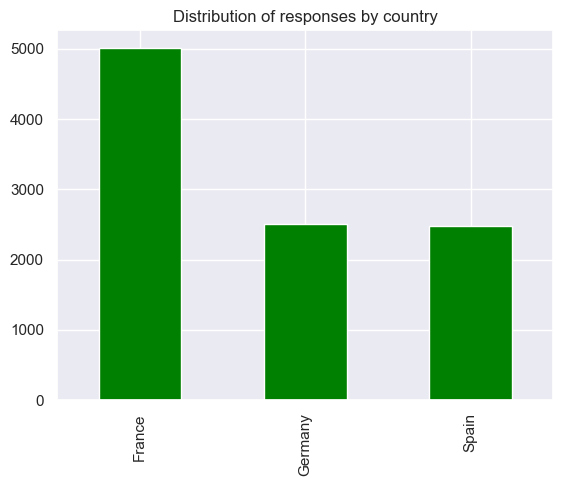

In [18]:
#смотрим на графике распределение пользователей по странам - видим, что потребителей из франции столько же, 
#сколько в Германии и Испании вместе

df['country'].value_counts().plot(kind = 'bar', color = 'green', title="Distribution of responses by country")

<AxesSubplot:title={'center':'Distribution of responses by age'}>

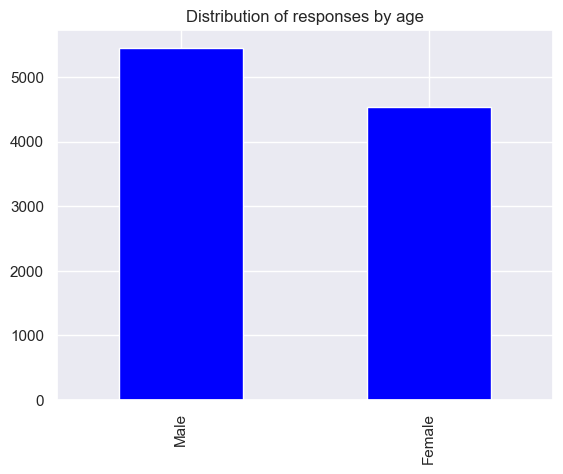

In [19]:
#смотрим на графике распределение пользователей по странам - видим, что распределение больше в мужской пол

df['gender'].value_counts().plot(kind = 'bar', color = 'blue', title="Distribution of responses by age")

<AxesSubplot:title={'center':'Churn by country'}, xlabel='country'>

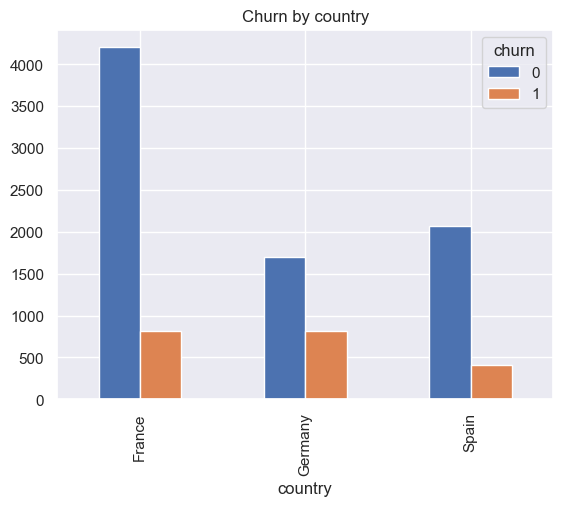

In [20]:
#наблюдаем с распределением оттока по странам - здесь подтверждается предыдущий вывод об оттоке в Германии

df_churn_by_country = df.groupby('country')['churn'].value_counts().unstack()
df_churn_by_country.plot(kind = 'bar', title="Churn by country")

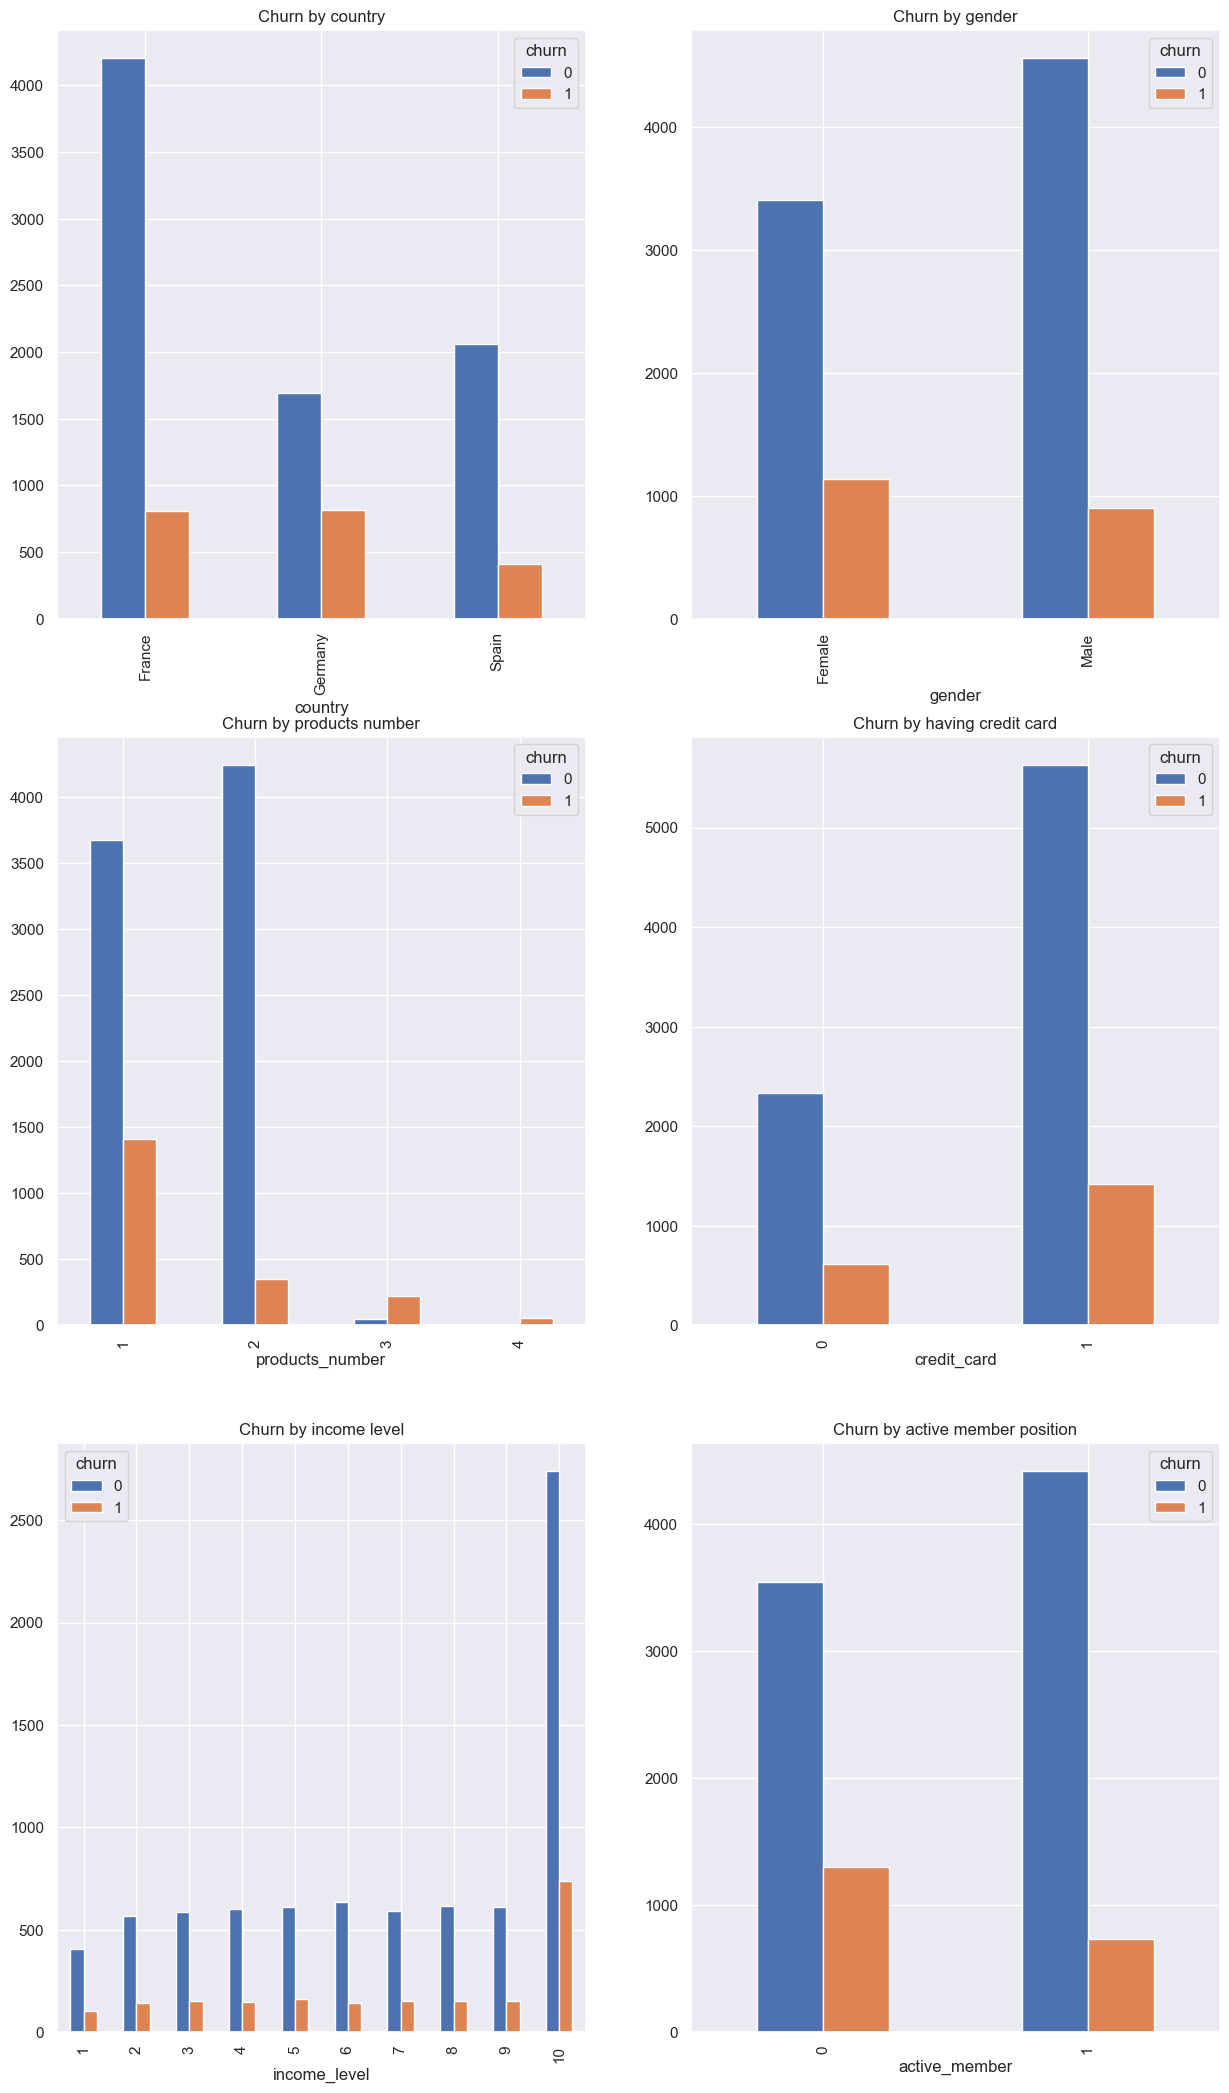

In [21]:
#на графике смотрим за распределениями по ключевым метрикам в таблице, здесь подтверждаются наши предыдущие выводы
#а также, видим, что кто не является активным участников банка, склонен покидать банки

fig,ax = plt.subplots(nrows=3, ncols=2, figsize=[15,26])

df.groupby('country')['churn'].value_counts().unstack().plot(kind = 'bar', title="Churn by country",ax=ax[0,0]);

df.groupby('gender')['churn'].value_counts().unstack().plot(kind = 'bar', title="Churn by gender",ax=ax[0,1]);

df.groupby('products_number')['churn'].value_counts().unstack().plot(kind = 'bar', title="Churn by products number",ax=ax[1,0]);

df.groupby('credit_card')['churn'].value_counts().unstack().plot(kind = 'bar', title="Churn by having credit card",ax=ax[1,1]);

df.groupby('active_member')['churn'].value_counts().unstack().plot(kind = 'bar', title="Churn by active member position",ax=ax[2,1]);

df.groupby('income_level')['churn'].value_counts().unstack().plot(kind = 'bar', title="Churn by income level",ax=ax[2,0]);

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

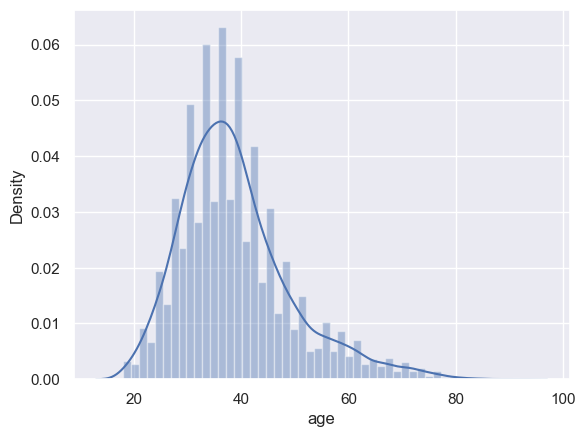

In [22]:
sns.distplot(df['age'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='estimated_salary', ylabel='Density'>

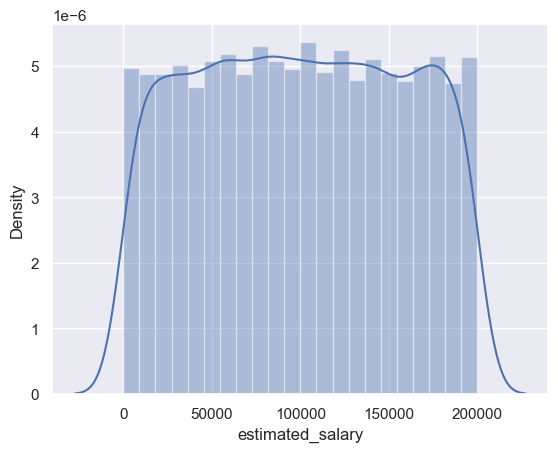

In [23]:
sns.distplot(df['estimated_salary'])

<AxesSubplot:xlabel='income_level', ylabel='balance'>

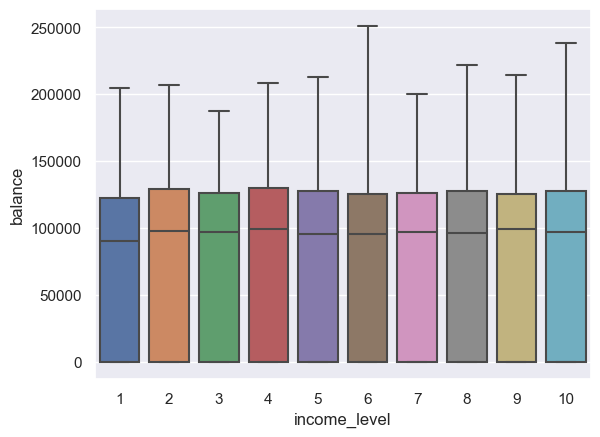

In [24]:
sns.boxplot(x=df['income_level'], y=df['balance'])

##### Видим, что потребители банков предсталены в равной пропорции по зарплате

In [25]:
correl = df.drop(columns=['customer_id', 'country', 'gender', 'income_level', 'best']).corr()
correl

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<AxesSubplot:>

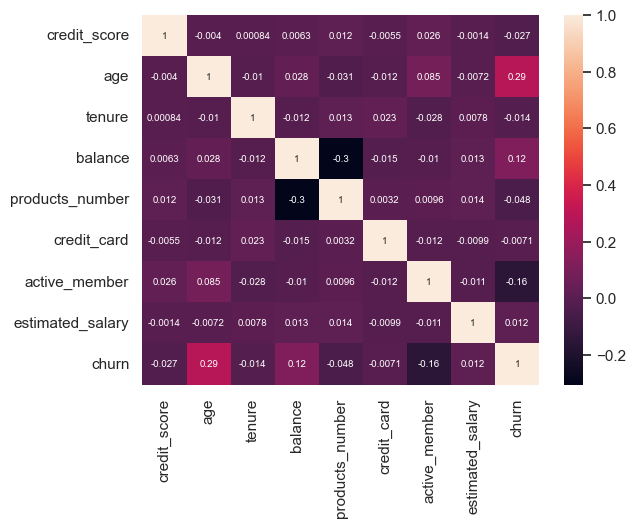

In [26]:
sns.heatmap(correl, annot = True, annot_kws={"size":7})

С помощью корреляционной таблицы можем сделать выводы о началичии корреляции 
1) баланса и номера продукта (обратная зависимость);
2) оттока и возраста;
3) активного пользователя банка и оттока (обратная зависимость)

# График нормальности распределения

In [27]:
salary_male = df[df['gender'] == 'Male']['estimated_salary']

<Figure size 640x480 with 0 Axes>

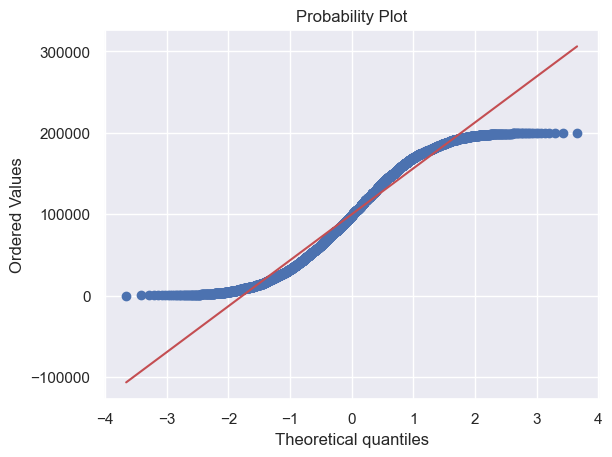

<Figure size 640x480 with 0 Axes>

In [28]:
import scipy
from scipy import stats
from scipy.stats import ttest_ind
stats.probplot(salary_male, plot = plt)
plt.figure()

##### График показывает нам, что если рассматривать распределение по зарплатам мужчин, то оно является нормальный, или даже зеркальным. Что подтверждается этапом проверки нормального распределения по зарплатам.

# Анализ с помощью хи-квадрата

H0: Присутствует связь между тем, что пользователь является финансово грамотным человеком и оттоком из банка

H1: Отсутствует связь между тем, что пользователь является финансово грамотным человеком и оттоком из банка

In [29]:
import scipy
hi_kv = df.groupby('best')['churn'].value_counts()

In [30]:
hi_kv.unstack()

churn,0,1
best,,
0,6988,1740
1,975,297


In [31]:
#считаем хиквадрат, степени свободы и уровень значимости

chi_2, p_val, dof, expected = scipy.stats.chi2_contingency(hi_kv.unstack(), correction = False)
output = "chi_2: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format(chi_2,dof, p_val))

chi_2: 7.973741262725158
degrees of freedom: 1
p-value: 0.0047460746238552785



In [32]:
#вычисляем критическое значение

alpha = 0.05 
critical_value = scipy.stats.chi2.ppf(0.95, 1)
critical_value

3.841458820694124

In [33]:
#проверяем гипотезу

if (chi_2 >= critical_value) & (p_val < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Отвергаем нулевую гипотезу


##### Следовательно, мы отвергаем нулевую гипотезу о том, что есть связь между тем, что человек является финансово грамотным человеком и оттоком из банков

# Анализ с помощью T-test

H0: Присутствует статистическая значимость между средней зарплатой потребителя из его возможном уходе.

H1: Отсутствует статистическая значимость между средней зарплатой потребителя из его возможном уходе.

In [34]:
ti_test = df.groupby('estimated_salary')['churn'].value_counts()

In [35]:
df_ti_test = ti_test.unstack()[0].to_frame()

In [36]:
#получаем итоговый датасет с зарплатой и фактом отток пользователя

df_ti_test = df_ti_test.fillna(0).reset_index()
df_ti_test

,estimated_salary,0
0,11.58,0.0
1,90.07,1.0
2,91.75,0.0
3,96.27,1.0
4,106.67,1.0
...,...,...
9994,199909.32,1.0
9995,199929.17,1.0
9996,199953.33,1.0
9997,199970.74,1.0


In [37]:
df_ti_test = df_ti_test.rename(columns={0:'churn'})

In [38]:
ti_test1 = df_ti_test[df_ti_test['churn']==1]
ti_test2 = df_ti_test[df_ti_test['churn']==0]

In [39]:
ttest_ind(ti_test1['estimated_salary'], ti_test2['estimated_salary'], equal_var= False)

Ttest_indResult(statistic=-1.1902651568518943, pvalue=0.2340322422324602)

In [40]:
a = 0.05
dof = 1
t_critical = 12.70

##### После поиска значения t_critical на https://statpsy.ru/t-student/t-test-tablica/ (t_statistic по модулю меньше t_critical) удалось выяснить, что мы отвергаем нашу нулевую гипотезу о том, что есть статистическая значимость между средней зарплатой потребителя из его возможном уходе.

# Линейная регрессия

##### Наша основная гипотеза состоит в том, что идет проверка влияния наших ключевых параметров на отток клиентов. 

In [41]:
import statsmodels.api as sm

In [42]:
#удираем все столбцы, которые либо дублируют наши показатели, либо не могут являться предикторами

df_linear = df.drop(columns=['customer_id', 'country', 'gender', 'income_level', 'best'])
df_linear

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


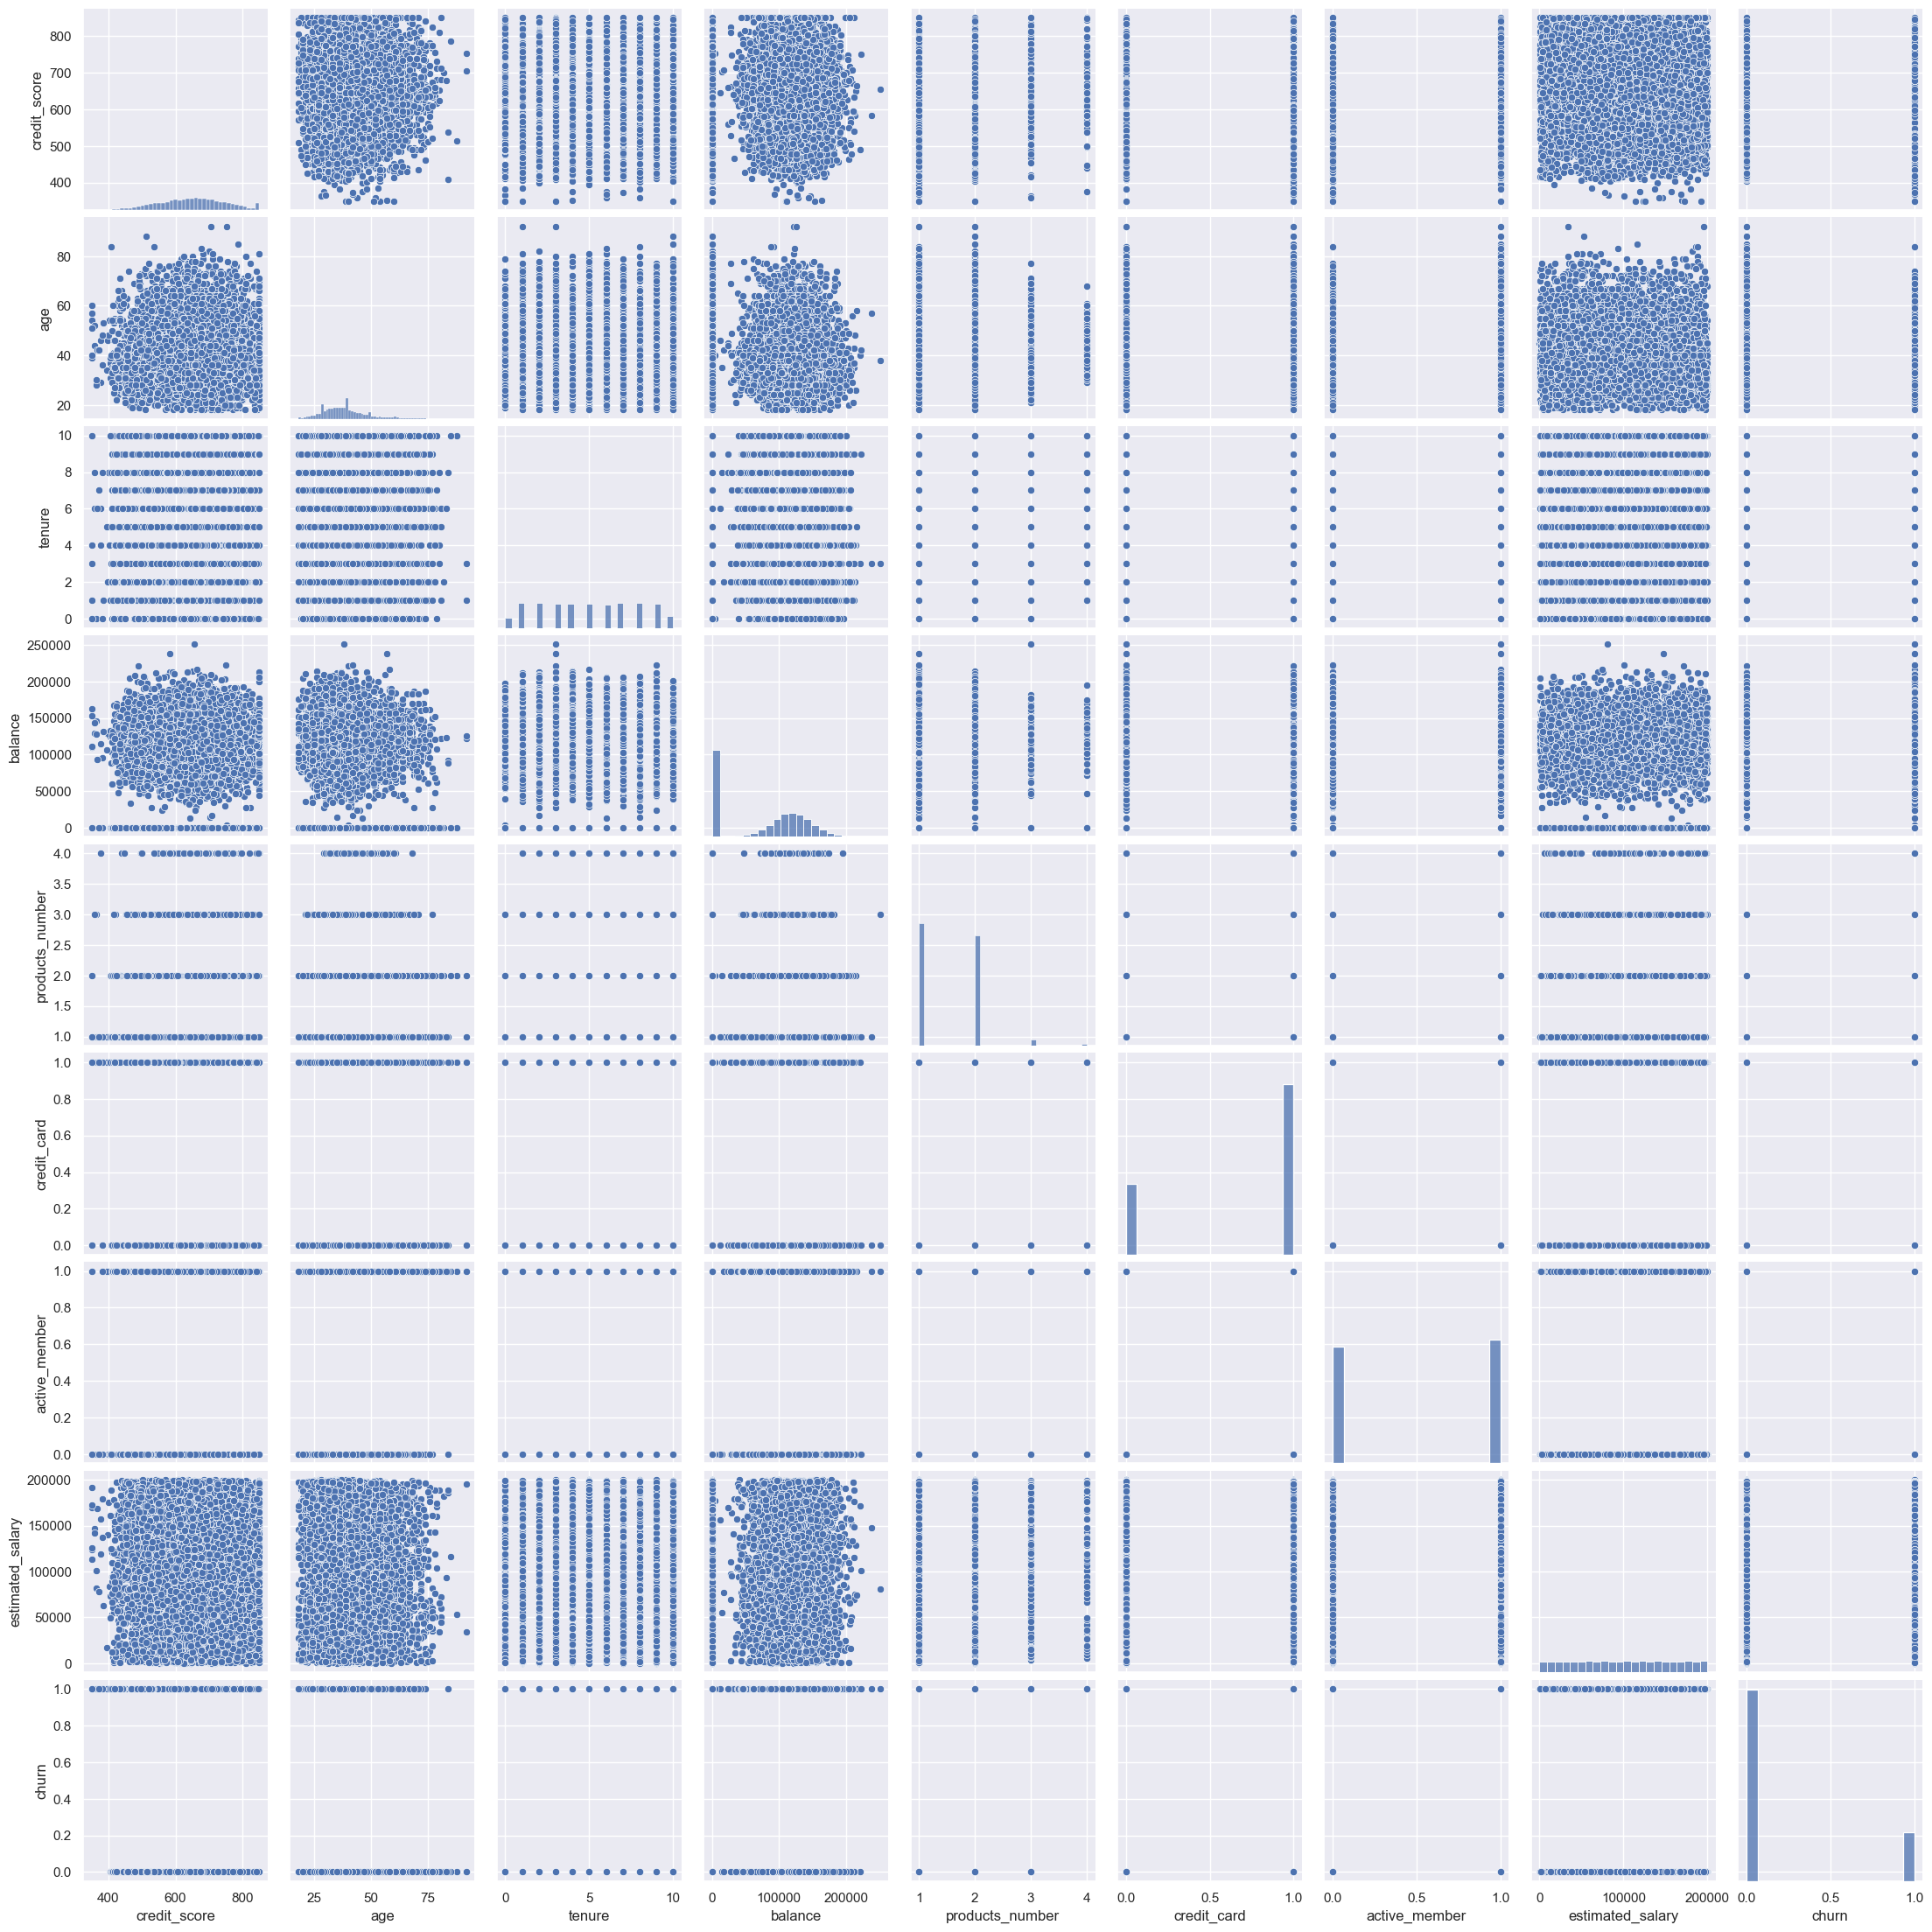

In [43]:
sns.pairplot(df_linear)

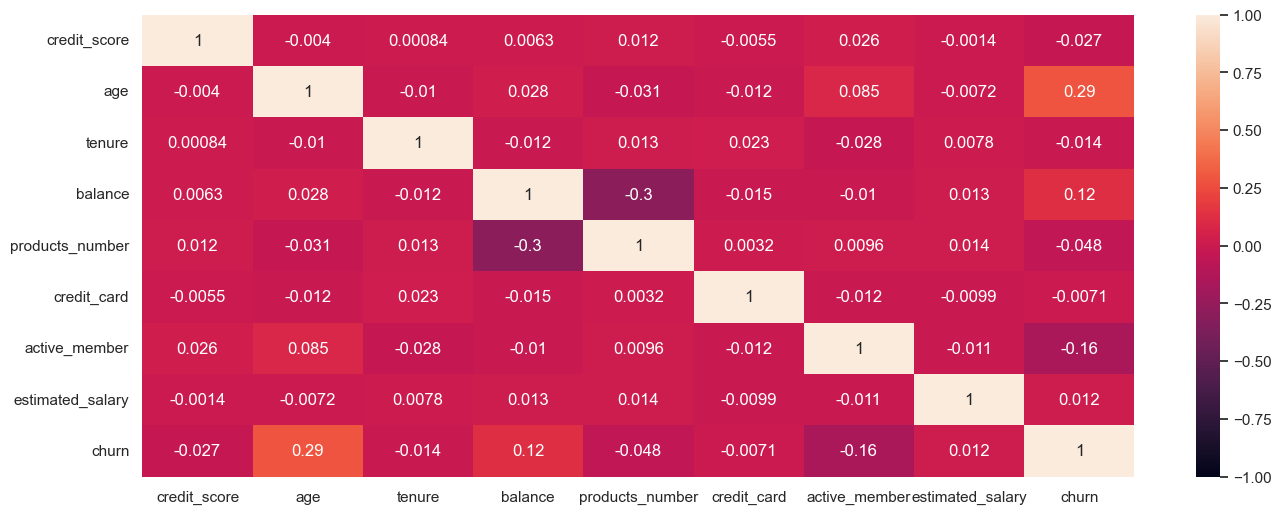

In [44]:
plt.figure(figsize = (16,6))
h_m = sns.heatmap(df_linear.corr(), vmin = -1, vmax = 1, annot = True)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
X = df_linear.drop('churn', axis=1)
Y = df_linear['churn']

X_constant = sm.add_constant(X)
mod = sm.OLS(Y, X_constant).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     181.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.91e-287
Time:                        23:33:13   Log-Likelihood:                -4417.0
No. Observations:               10000   AIC:                             8852.
Df Residuals:                    9991   BIC:                             8917.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1499      0.034  

In [47]:
df_linear_train, df_linear_test = train_test_split(df_linear, test_size=0.25, random_state=42)

In [48]:
features_train = df_linear_train.drop('churn', axis=1)
features_test = df_linear_test.drop('churn', axis=1)
target_train = df_linear_train.loc[:,'churn'].to_frame()
target_test = df_linear_test.loc[:,'churn'].to_frame()

In [49]:
model = LinearRegression().fit(X, Y)
model.fit(features_train,target_train)
predictions = model.predict(features_test)
print(mean_squared_error(target_test, predictions))
print(mean_absolute_error(target_test, predictions))

0.1385787268536604
0.28846243527871945


In [50]:
r_sq = model.score(X, Y)
print('Коэффициент детерминации:', r_sq)

Коэффициент детерминации: 0.12675090944170442


##### По итогу линейной регрессии мы получили, что больше всего влияют на отток клиентов 3 переменные: 1) Кредитный рейтинг (Влияние обратно пропорциональное, то есть чем выше рейтинг, тем больше шанс, что потребитель покинет банк) 2 и 3) Зарплата и баланс (Здесь прямое влияние - чем выше показатели, тем выше шанс, что потребитель останется в банке).

##### Но здесь важно упомянуть, что в данной модели очень низкий коэффициент детерминации, что говорит о том, что результаты не валидны в полной мере.

# Логистическая регрессия

##### Наша основная гипотеза состоит в том, что идет проверка влияния наших ключевых параметров на отток клиентов. 

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42).fit(features_train, target_train)
predictions = logreg.predict(features_test)
score = logreg.score(features_test, target_test)
score

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8

In [52]:
logreg.coef_

array([[-4.98460815e-03,  4.34311274e-02, -1.68257605e-03,
         3.73602640e-06, -4.70495670e-04, -2.25639308e-04,
        -1.40878046e-03, -1.41290236e-06]])

In [53]:
df_log_coefs = pd.DataFrame(logreg.coef_, columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary'])
df_log_coefs

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,-0.004985,0.043431,-0.001683,0.000004,-0.00047,-0.000226,-0.001409,-0.000001


##### Если сравнивать с линейной регрессией, то здесь результат намного выше, и составляет 80% попадания в тестовую выборку, с учетом размера в 25% тестовой выборки. Это говорит о хорошей репрезентативности полученных результатов. Что касается влияния, то самые лучшие - возраст и время владения продуктами потребителем.